In [1]:
# ============================
# Import Libraries
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from google.colab import drive
import pandas as pd

drive.mount('/content/drive') # COMMENT THIS OUT IF NOT ENTERING TEST AND TRAIN FROM DRIVE

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


Mounted at /content/drive


In [2]:
# ==============================
# A. Load Datasets from Drive (RUN EITHER A OR B)
# ==============================
# If train.csv and test.csv are accessed from Google Drive

train_df = pd.read_csv('/content/drive/MyDrive/School/d. University/Year 4/Spring 2025/CPEN 355/Final Project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/School/d. University/Year 4/Spring 2025/CPEN 355/Final Project/test.csv')

training_data_original = train_df.copy() # To help with debugging
testing_data_original = test_df.copy() # To help with debugging

#train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# ============================
# B. Load Datasets from Colab Directory (RUN EITHER A OR B)
# ============================
# If train.csv and test.csv were manually uploaded

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

training_data_original = train_df.copy() # To help with debugging
testing_data_original = test_df.copy() # To help with debugging

train_df.head()
#test_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
# ============================
# Data Preprocessing
# ============================
train_df = training_data_original
test_df = testing_data_original

print("Training set missing values:")
print(train_df.isnull().sum())
print("\nTest set missing values:")
print(test_df.isnull().sum())

# Drop irrelevant or hard-to-use columns
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fill numeric missing values
train_df['Age'] = num_imputer.fit_transform(train_df[['Age']]).ravel() # train missing 177 entries
test_df['Age'] = num_imputer.transform(test_df[['Age']]).ravel() # test missing 86 entries

test_df['Fare'] = num_imputer.fit_transform(test_df[['Fare']]).ravel()  # test missing 1 entries

# Fill categorical missing values
train_df['Embarked'] = cat_imputer.fit_transform(train_df[['Embarked']]).ravel() # train missing 2 entries

# -------------------- #

# Encode 'Sex' using LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

# One-hot encode 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


Training set missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test set missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


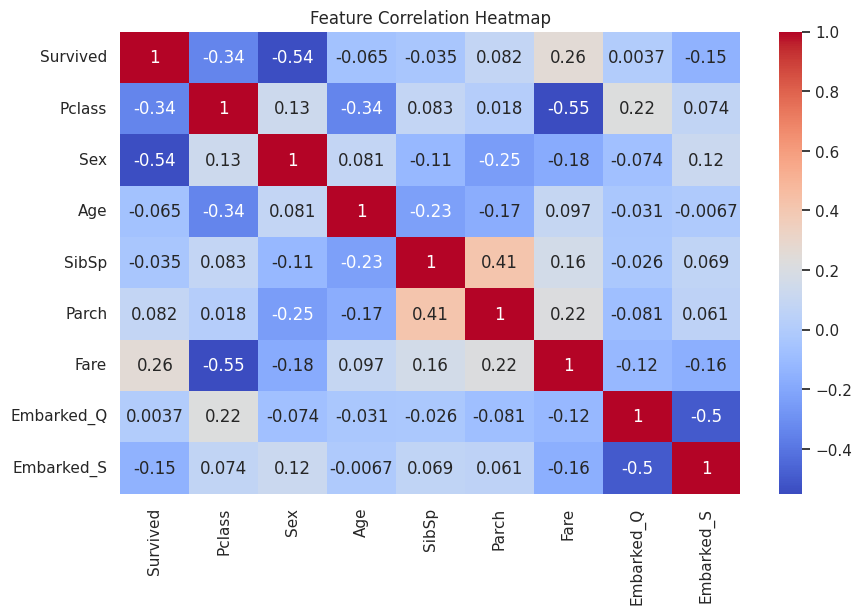

In [4]:
# ============================
# Scaling & Splitting
# ============================
# Separate features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Train/validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# ============================
# Train & Evaluate Models
# ============================

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=69),
    'SVM': SVC(kernel='rbf', probability=True),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    print(f"\n {name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))



 Logistic Regression Accuracy: 0.8101
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


 Random Forest Accuracy: 0.8101
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


 SVM Accuracy: 0.8212
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy      

In [ ]:
# ============================
# Cross-Validation
# ============================

# Recombine X and y for full training set for cross validation
X_full_scaled = scaler.fit_transform(X)
y_full = y.copy()

print("\n=== Cross-Validation Scores ===")
for name, model in models.items():
    scores = cross_val_score(model, X_full_scaled, y_full, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")


=== Cross-Validation Scores ===
Logistic Regression: Mean Accuracy = 0.7857, Std Dev = 0.0184
Random Forest: Mean Accuracy = 0.8104, Std Dev = 0.0259
SVM: Mean Accuracy = 0.8272, Std Dev = 0.0296
Naive Bayes: Mean Accuracy = 0.7779, Std Dev = 0.0346


In [ ]:
# ============================
# Final Model Training for Kaggle submission (OPTIONAL)
# ============================

# Choose model for prediction csv generation
best_model_name = 'SVM'
best_model = models[best_model_name]

# Fit the best model to the full training set
best_model.fit(X_full_scaled, y_full)
test_scaled = scaler.transform(test_df)

# Make predictions
final_predictions = best_model.predict(test_scaled)

# Load original test.csv to get PassengerId
raw_test = testing_data_original

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': raw_test['PassengerId'],
    'Survived': final_predictions
})

# Save to CSV for Kaggle
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file 'titanic_submission.csv' created")


Submission file 'titanic_submission.csv' created
